In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('Customer Churn.csv')

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
# now analysis of eda start

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# making changes in the data type of totalcharrges

In [8]:
df["TotalCharges"] = df["TotalCharges"].replace(" " , "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [9]:
# to see the changes maded in totalcharges column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
#checking null values 
df.isnull().sum().sum()

0

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
# to check the duplicates in the data
df.duplicated().sum()

0

In [13]:
# now checking duplictes according to the primary key
df["customerID"].duplicated().sum()

0

In [14]:
# replacing the 1 and 0 of senior citizen to yes and no
def conv(value):
    if value==1 :
       return "yes"
    else : 
       return "no"
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
# now starting the analysis

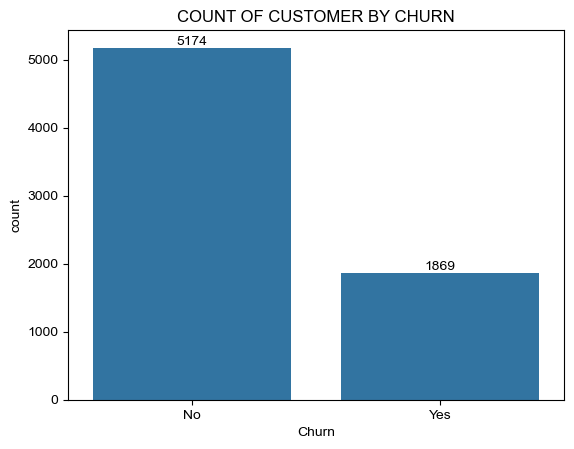

In [17]:
ax =sns.countplot(x = 'Churn' , data = df)
ax.bar_label(ax.containers[0])
sns.set(rc={'figure.figsize': (5, 3)})
plt.title("COUNT OF CUSTOMER BY CHURN")

plt.show()

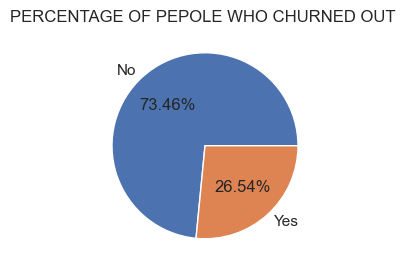

In [18]:
plt.figure(figsize = (3,4))
plt.title("PERCENTAGE OF PEPOLE WHO CHURNED OUT ")
gb = df.groupby("Churn").agg({'Churn':"count"})
gb
plt.pie(gb['Churn'] , labels = gb.index , autopct = "%1.2f%%")
plt.show()        

In [19]:
# frm the given pie chart we can conclude that 26.54% of our company has churned out 
# now lets fimd the reason behind this

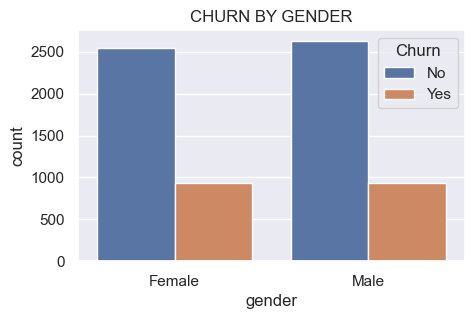

In [20]:
sns.countplot(x= "gender" , data = df , hue = "Churn")
plt.title("CHURN BY GENDER")
plt.show()
sns.set(rc={'figure.figsize': (5, 3)})

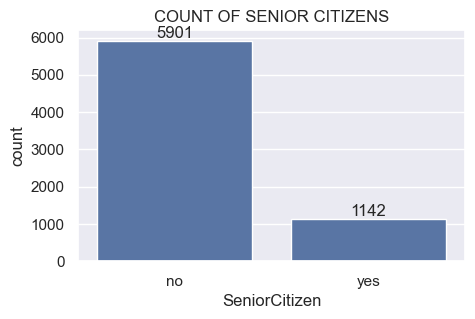

In [21]:
ax = sns.countplot(x= "SeniorCitizen" , data = df )
ax.bar_label(ax.containers[0])
plt.title("COUNT OF SENIOR CITIZENS")
plt.show()
sns.set(rc={'figure.figsize': (5, 3)})

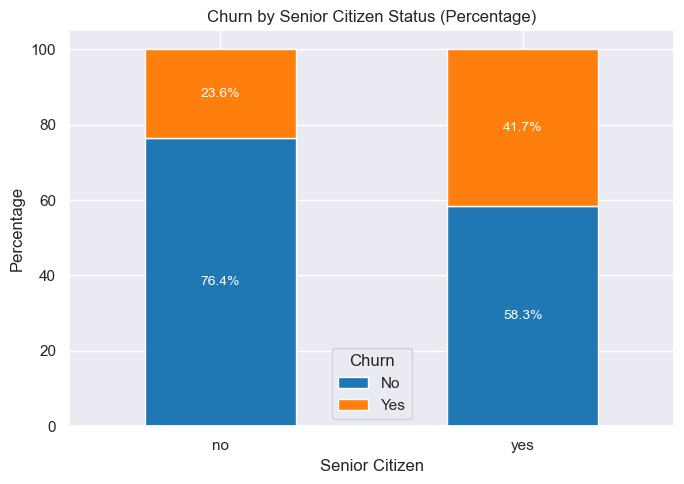

In [22]:
normalized_data = (
    pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
).reset_index()

# Replace 0 and 1 with labels for better readability
normalized_data['SeniorCitizen'] = normalized_data['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

# Plot the stacked bar chart
ax = normalized_data.set_index('SeniorCitizen').plot(
    kind='bar',
    stacked=True,
    figsize=(7, 5),
    color =  ['#1f77b4', '#ff7f0e']
)

# Add percentage labels
for bar_group in ax.containers:
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:  # Add labels only for visible bars
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center', va='center', fontsize=10, color='white'
            )

# Customize the chart
plt.title("Churn by Senior Citizen Status (Percentage)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.xticks(rotation=0)
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


In [23]:
## compartively we can see that we have less number of senior citizens in our company and most of them has churned out . 41.7% of the total senior citizens present has churned out 

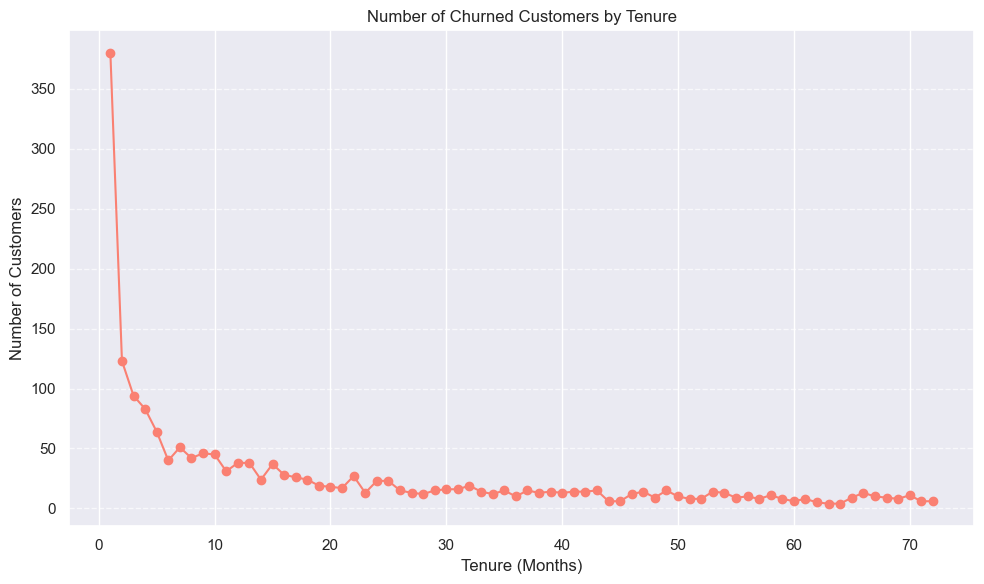

In [24]:

# Assuming df is your DataFrame with 'tenure' and 'Churn' columns

# Filter the data to include only churned customers
churned_customers = df[df['Churn'] == 'Yes']

# Aggregate the count of churned customers by tenure
churned_tenure_counts = churned_customers['tenure'].value_counts().sort_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(churned_tenure_counts.index, churned_tenure_counts.values, marker='o', color='salmon')

# Customize the chart
plt.title("Number of Churned Customers by Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


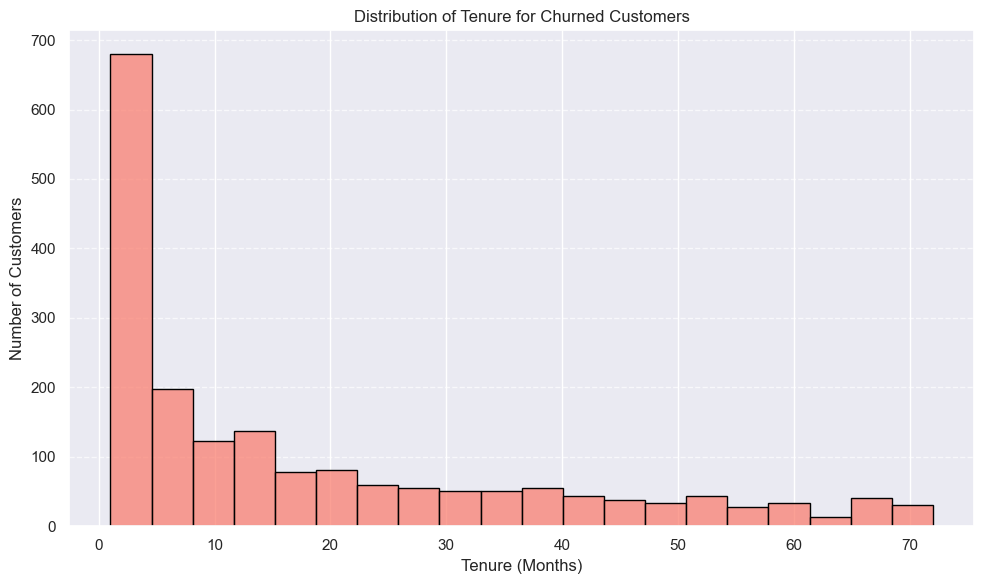

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with 'tenure' and 'Churn' columns

# Filter the data to include only churned customers
churned_customers = df[df['Churn'] == 'Yes']

# Plot the distribution of tenure for churned customers
plt.figure(figsize=(10, 6))
sns.histplot(churned_customers['tenure'], bins=20, kde=False, color='salmon', edgecolor='black')

# Customize the chart
plt.title("Distribution of Tenure for Churned Customers")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [27]:
## FROM THE GRAPH YOU CAN SEE THAT PEOPLE WHO HAVE USED OUR SERVICES FOR LONGER PERIO OF TIME THEY HAVEN'T CHURNED ,
##BUT THE CUSTOMERS WHO HAVE USED OUR SERVICES FOR 1 TO 2 MONTHS THEY HAVE CHURNED OUT .

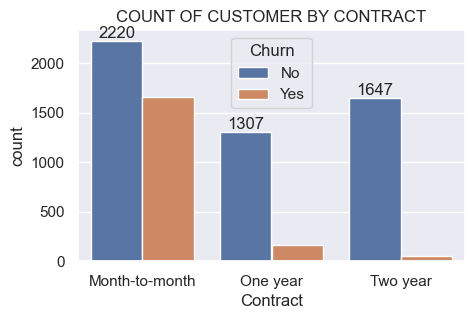

In [31]:
ax =sns.countplot(x = 'Contract' , data = df , hue = 'Churn')
ax.bar_label(ax.containers[0])
sns.set(rc={'figure.figsize': (5, 3)})
plt.title("COUNT OF CUSTOMER BY CONTRACT")

plt.show()

In [ ]:
## SO NOW WE CAN SEE THAT CUSTOMERS WHO HAVE TAKE THE CONTRACT OF MONTH TO MONTH HAVE CHURNED 
## THE MOST , SO NOW TO RESOLVE THAT WE CAN CONVIENCE THE CUSTOMERS TO TAKE OUR ONE YEAR CONTRACT OR WE
## CAN ALSO INTRODUCE 2 NEW CONTRACTS OF 6 MONTH EACH .

In [47]:
colums = df.columns  
print(colums)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


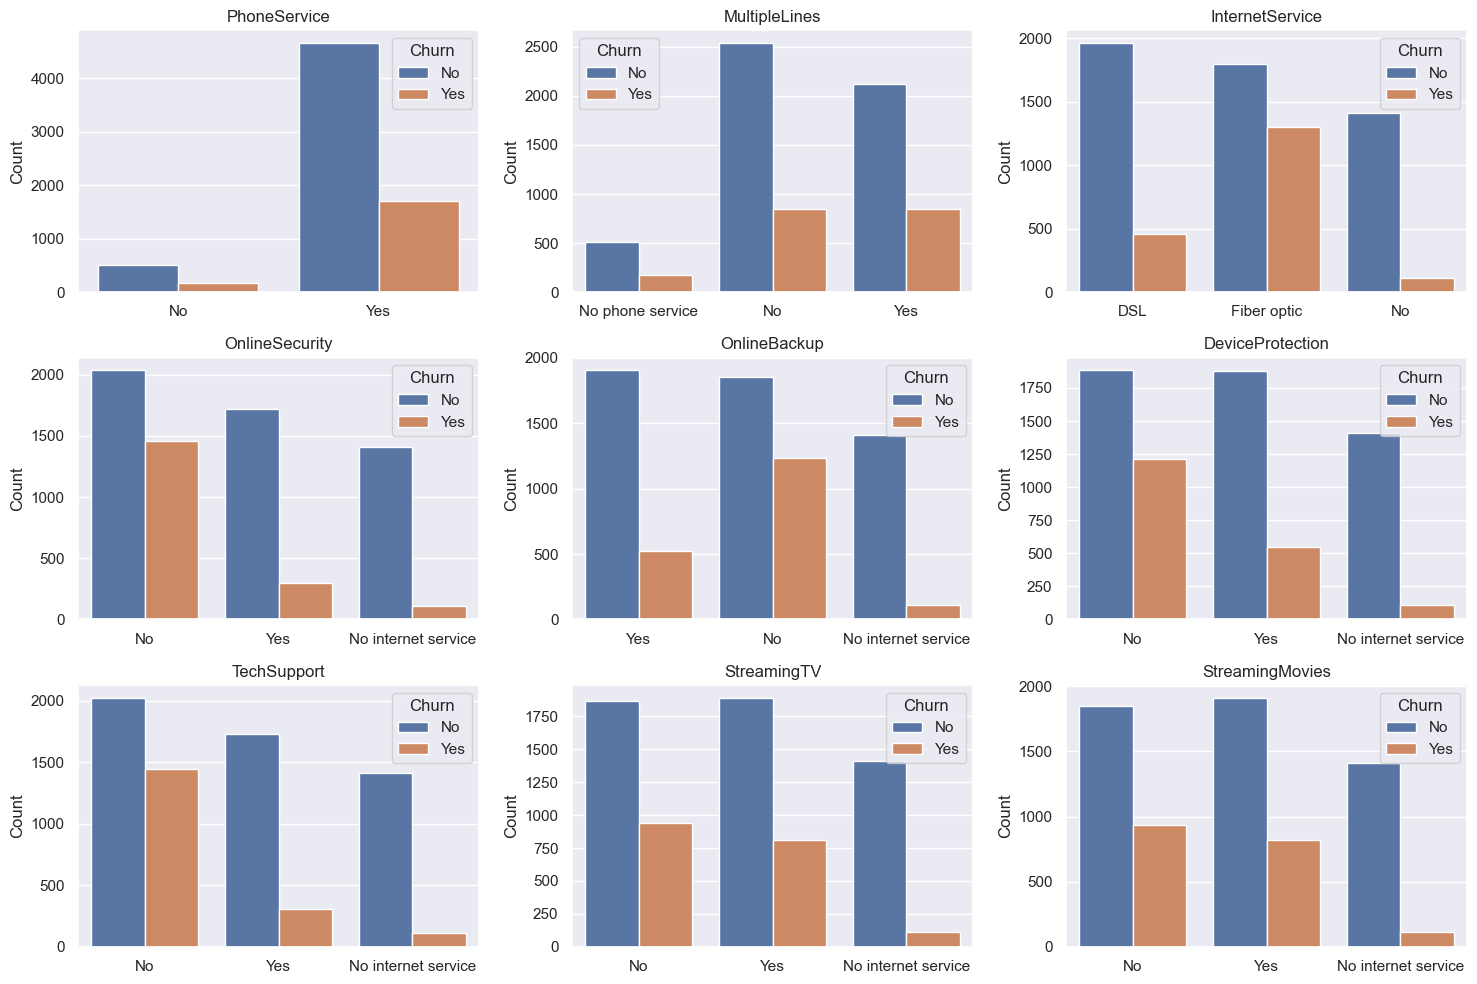

In [65]:
# Define columns for subplots
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
n_cols = 3  # Number of columns per row
n_rows = -(-len(columns) // n_cols)  # Calculate rows needed using ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust size as needed
axes = axes.flatten()  # Flatten axes for easy indexing

# Plot countplots for each column
for idx, column in enumerate(columns):
    sns.countplot(data=df, x=column, ax=axes[idx] , hue = df['Churn'])
    axes[idx].set_title(column)
    axes[idx].set_xlabel("")  # Remove x-label if unnecessary
    axes[idx].set_ylabel("Count")

# Remove unused subplots if the grid is larger than required
for ax in axes[len(columns):]:
    ax.remove()

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:

##Customers without OnlineSecurity, OnlineBackup, or TechSupport show higher churn, highlighting these services' role in retention. 
##Fiber optic users churn more, indicating possible dissatisfaction, while streaming services show a slight churn association. 
##Improving fiber optics and bundling key services could reduce churn.

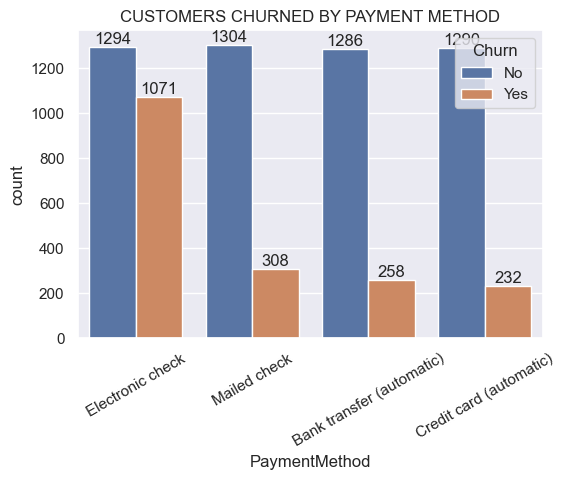

In [71]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x= "PaymentMethod" , data = df , hue = df['Churn'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("CUSTOMERS CHURNED BY PAYMENT METHOD")
plt.xticks(rotation = 30)
plt.show()
                   

In [73]:
# customer is likely to churn when he/she uses electronic check for payment
